## Import thư viện

In [ ]:
# !python.exe -m pip install --upgrade pip

In [ ]:
# %pip install face_recognition opencv-python

## Lấy ảnh User và lưu thành data
Description:
- Access camera máy tính
- Chụp ảnh người dùng
- Lưu ảnh .jpg hoặc .png vào folder 'C:\Users\Bao Dinh\Documents\GitHub\Smart-Door-Lock-System-with-Face-Recognition\data'

## Read data
Description:
- Đọc ảnh đã chụp của user dưới dạng RGB
- Convert ảnh sang Grayscale để giảm dung lượng

## Face detection
Description:
- Detect face-only của user, lưu thành ảnh mới (ảnh grayscale)

# Face recogniton OpenCV-based

In [10]:
from deepface import DeepFace

In [40]:
result = DeepFace.verify(
	img1_path = "face_known_0.jpg",
	img2_path = "face_test2_0.jpg"
)

print("Match?" , result["verified"])
print("Distance:", result["distance"])


Match? True
Distance: 0.1083105670948874


In [12]:
result = DeepFace.verify(img1_path = "known.jpg", img2_path = "test.jpg")
print(result)

{'verified': True, 'distance': 0.15278841513777963, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 436, 'y': 201, 'w': 390, 'h': 390, 'left_eye': (690, 347), 'right_eye': (553, 348)}, 'img2': {'x': 574, 'y': 232, 'w': 355, 'h': 355, 'left_eye': None, 'right_eye': None}}, 'time': 0.54}


25-06-09 13:22:40 - retinaface.h5 will be downloaded from the url https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/retinaface.h5
To: C:\Users\Bao Dinh\.deepface\weights\retinaface.h5
100%|██████████| 119M/119M [00:31<00:00, 3.72MB/s] 


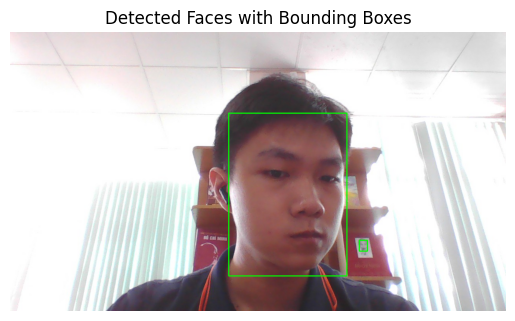

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Đường dẫn ảnh
img_path = "test.jpg"

# Trích khuôn mặt và bounding box (giữ lại ảnh gốc có bounding box)
faces = DeepFace.extract_faces(
	img_path = img_path,
	detector_backend = "retinaface",  # có thể dùng "mtcnn" hoặc "opencv"
	enforce_detection = True,
	align = False
)

# Đọc ảnh gốc để vẽ bounding box
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Duyệt qua các khuôn mặt được phát hiện
for face in faces:
	box = face["facial_area"]
	x, y, w, h = box["x"], box["y"], box["w"], box["h"]
	cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Hiển thị ảnh với bounding box
plt.imshow(image)
plt.title("Detected Faces with Bounding Boxes")
plt.axis("off")
plt.show()

Match? => False
Distance: 0.15007062312015218


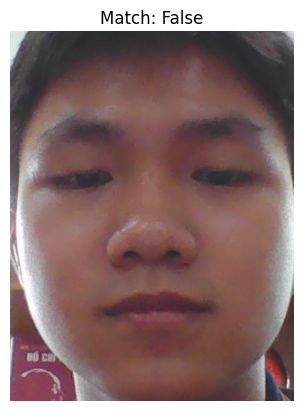

In [42]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

# Đường dẫn tới ảnh mẫu và ảnh test
img1_path = "face_known_0.jpg"  # Ảnh đã đăng ký trước
img2_path = "face_test2_0.jpg"   # Ảnh cần kiểm tra (ví dụ từ camera)

# Thực hiện so sánh hai ảnh dùng OpenFace
result = DeepFace.verify(
	img1_path = img1_path,
	img2_path = img2_path,
	model_name = "OpenFace",
	detector_backend = "retinaface",  # mạnh hơn opencv
	enforce_detection = True
)

# In kết quả
print("Match? =>", result["verified"])
print("Distance:", result["distance"])

# Hiển thị ảnh test kèm tiêu đề
img = cv2.imread(img2_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Match: " + str(result["verified"]))
plt.axis("off")
plt.show()


In [58]:
# Danh sách ảnh cần xử lý
image_list = ["known.jpg", "test1.jpg", "test2.jpg", "test3.jpg", "test4.jpg"]

for img_path in image_list:
	try:
		# Phát hiện khuôn mặt trong ảnh
		faces = DeepFace.extract_faces(
			img_path = img_path,
			detector_backend = "retinaface",
			enforce_detection = True,
			align = True
		)

		# Duyệt và lưu từng khuôn mặt
		for i, face in enumerate(faces):
			face_img = (face["face"] * 255).astype("uint8")

			# Tạo tên file: face_known.jpg, face_test1.jpg,...
			base_name = img_path.split(".")[0]
			save_name = f"face_{base_name}_{i}.jpg"

			cv2.imwrite(save_name, cv2.cvtColor(face_img, cv2.COLOR_RGB2BGR))
			print(f"✅ Đã lưu ảnh khuôn mặt: {save_name}")

	except Exception as e:
		print(f"❌ Lỗi với ảnh {img_path}: {e}")


✅ Đã lưu ảnh khuôn mặt: face_known_0.jpg
✅ Đã lưu ảnh khuôn mặt: face_test1_0.jpg
✅ Đã lưu ảnh khuôn mặt: face_test2_0.jpg
✅ Đã lưu ảnh khuôn mặt: face_test3_0.jpg
❌ Lỗi với ảnh test4.jpg: Face could not be detected in test4.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


In [46]:
import tensorflow as tf
from deepface.DeepFace import build_model

# Load mô hình Keras từ DeepFace
model = build_model("Facenet")  # hoặc "OpenFace", "Facenet512", "ArcFace"


25-06-09 14:06:26 - facenet_weights.h5 will be downloaded...


 49%|████▉     | 45.6M/92.2M [09:20<09:47, 79.3kB/s]Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\Bao Dinh\.deepface\weights\facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:23<00:00, 4.00MB/s]


In [48]:
# TFLite Conversion + Quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Lưu mô hình
with open("facenet_quantized.tflite", "wb") as f:
	f.write(tflite_model)

print("✅ Mô hình Facenet đã được nén và lưu thành công!")


AttributeError: 'FaceNet128dClient' object has no attribute 'call'

In [61]:
import tensorflow as tf
import numpy as np
import cv2

def preprocess_image(img_path):
	img = cv2.imread(img_path)
	img = cv2.resize(img, (112, 112))  # MobileFaceNet yêu cầu 112x112
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	img = img.astype("float32") / 255.0
	img = (img - 0.5) / 0.5  # Chuẩn hóa [-1, 1] nếu model yêu cầu
	return np.expand_dims(img, axis=0)

def get_embedding(tflite_model_path, img_input):
	interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
	interpreter.allocate_tensors()

	input_details = interpreter.get_input_details()
	output_details = interpreter.get_output_details()

	interpreter.set_tensor(input_details[0]['index'], img_input)
	interpreter.invoke()
	output_data = interpreter.get_tensor(output_details[0]['index'])
	return output_data[0]

def compare_embeddings(emb1, emb2):
	# Chuẩn hóa vector để tính cosine nếu cần
	emb1 = emb1 / np.linalg.norm(emb1)
	emb2 = emb2 / np.linalg.norm(emb2)
	distance = np.linalg.norm(emb1 - emb2)
	return distance

# Đường dẫn ảnh
img1_path = "face_known_0.jpg"
img2_path = "face_test1_0.jpg"

# Load ảnh và lấy embedding
img1_input = preprocess_image(img1_path)
img2_input = preprocess_image(img2_path)

embedding1 = get_embedding("MobileFaceNet_model.tflite", img1_input)
embedding2 = get_embedding("MobileFaceNet_model.tflite", img2_input)

# So sánh
distance = compare_embeddings(embedding1, embedding2)
threshold = 1.1  # Có thể điều chỉnh (MobileFaceNet thường dùng 0.9–1.2)

print("✅ Kết quả:")
print("Match? ", distance < threshold)
print("Distance:", distance)


✅ Kết quả:
Match?  True
Distance: 1.012959


In [86]:
import numpy as np
import cv2
import tensorflow as tf

# 1. Load model TFLite (MobileFaceNet)
interpreter = tf.lite.Interpreter(model_path="MobileFaceNet_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# 2. Hàm tiền xử lý ảnh
def preprocess_face(img_path, target_size=(112, 112)):
	img = cv2.imread(img_path)
	if img is None:
		raise ValueError(f"Không tìm thấy ảnh: {img_path}")
	img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	img = cv2.resize(img, target_size)
	img = img.astype("float32") / 127.5 - 1
	return img

# 3. Hàm trích xuất đặc trưng khuôn mặt
def get_embedding(img_path):
	img = preprocess_face(img_path)
	img = np.expand_dims(img, axis=0)
	interpreter.set_tensor(input_details[0]['index'], img)
	interpreter.invoke()
	embedding = interpreter.get_tensor(output_details[0]['index'])[0]
	return embedding

# 4. Nhúng và so sánh
embedding_known = get_embedding("input.jpg")
embedding_test = get_embedding("known.jpg")

# 5. Tính cosine similarity
def cosine_similarity(vec1, vec2):
	return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

similarity = cosine_similarity(embedding_known, embedding_test)
print(f"Cosine Similarity: {similarity:.4f}")

# 6. Kết luận
threshold = 0.4
if similarity > 1 - threshold:
	print("✅ Mở khóa! (match)")
else:
	print("❌ Không mở khóa. (no match)")


Cosine Similarity: 0.4504
❌ Không mở khóa. (no match)
